|████████████████████████████████████████| 25/25 [100%] in 0.1s (197.10/s)      


/tmp/ipykernel_17495/1168081277.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


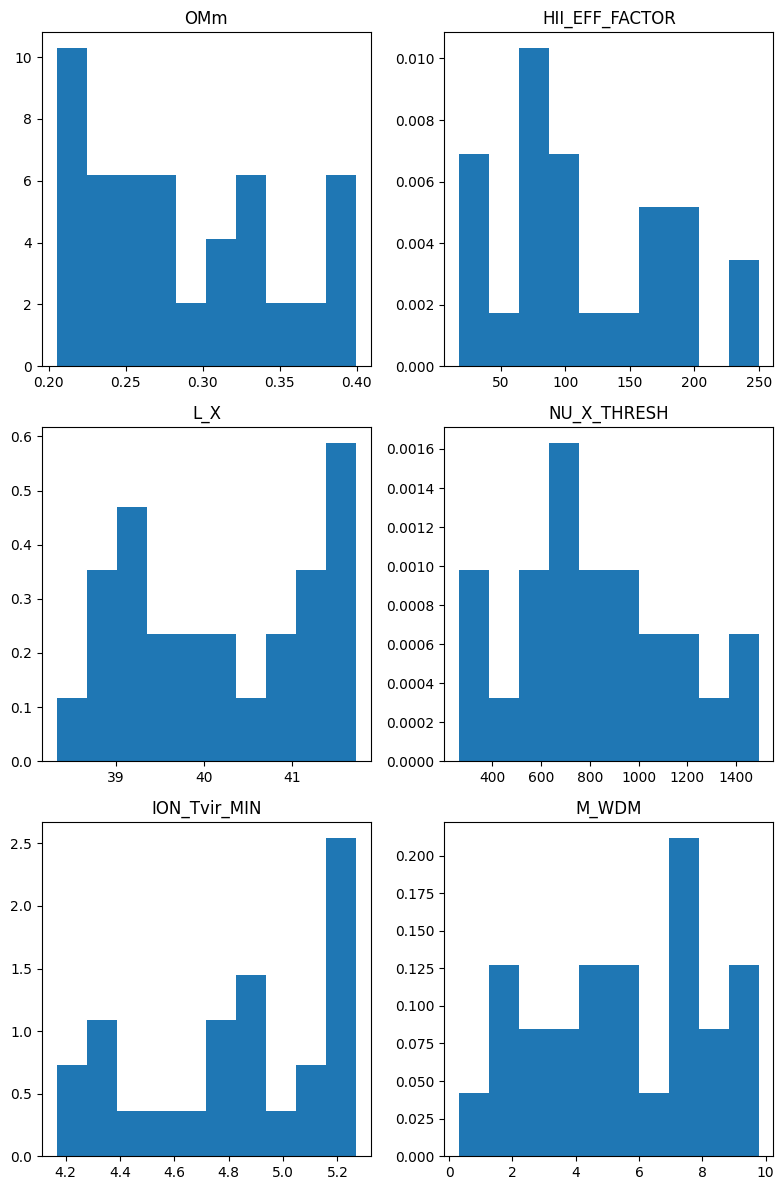

In [42]:
import py21cmfast as p21c
import os, fnmatch
import numpy as np
from alive_progress import alive_bar
from matplotlib import pyplot as plt

files = fnmatch.filter(os.listdir("./evaluation_data/"), "run_" + "*")


OMm, HII_EFF_FACTOR, L_X, NU_X_THRESH, ION_Tvir_MIN, M_WDM  = ([] for _ in range(6))

with alive_bar(len(files), force_tty=True) as bar:
    for file in files:
        lc = p21c.outputs.LightCone.read(fname=file, direc="./evaluation_data/")
        OMm.append(lc.cosmo_params.OMm)
        HII_EFF_FACTOR.append(lc.astro_params.HII_EFF_FACTOR)
        L_X.append(lc.astro_params.L_X)
        NU_X_THRESH.append(lc.astro_params.NU_X_THRESH)
        ION_Tvir_MIN.append(lc.astro_params.ION_Tvir_MIN)
        M_WDM.append(lc.global_params["M_WDM"])
        bar()

fig, ax = plt.subplots(3,2, figsize=(8,12))
bins = 10
ax[0,0].hist(OMm, bins=bins)
ax[0,0].set_title("OMm")

ax[0,1].hist(HII_EFF_FACTOR, bins=bins)
ax[0,1].set_title("HII_EFF_FACTOR")

ax[1,0].hist(L_X, bins=bins)
ax[1,0].set_title("L_X")

ax[1,1].hist(NU_X_THRESH, bins=bins)
ax[1,1].set_title("NU_X_THRESH")

ax[2,0].hist(ION_Tvir_MIN, bins=bins)
ax[2,0].set_title("ION_Tvir_MIN")

ax[2,1].hist(M_WDM, bins=bins)
ax[2,1].set_title("M_WDM")

fig.tight_layout()
fig.savefig("./evaluation_data/parameter_distribution.png")
fig.show()

In [1]:
import py21cmfast as p21c
import os, fnmatch
import numpy as np
from alive_progress import alive_bar
from matplotlib import pyplot as plt
files = fnmatch.filter(os.listdir("./evaluation_data/"), "run_" + "*")

/home/potato/Documents/projects/master/p21cm-venv/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/potato/Documents/projects/master/p21cm-venv/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [3]:
lc = p21c.outputs.LightCone.read(fname=files[0], direc="./evaluation_data/")

In [6]:
lc.brightness_temp = np.array([1,2,3])

In [7]:
lc.brightness_temp

array([1, 2, 3])

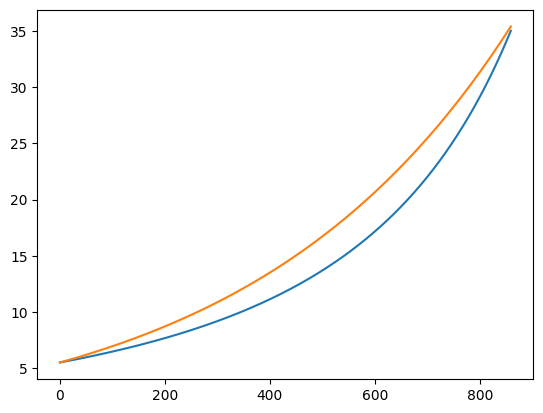

In [50]:
plt.plot(z_lc)
plt.plot(z_node)